In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models # to use pre-trained models, here vgg16 model would be used
from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json #load imagenet labels which is in .json format

In [2]:
# Here we are using colored image
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

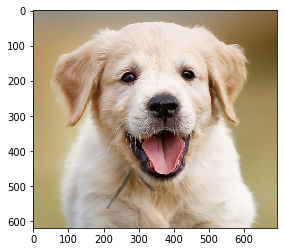

In [11]:
image = Image.open('dog.jpg')
plt.imshow(image)

In [4]:
vgg = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Admin/.cache\torch\checkpoints\vgg16-397923af.pth


In [6]:
vgg.classifier[-1]    #printing the last FC layer config

Linear(in_features=4096, out_features=1000, bias=True)

In [7]:
CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

In [12]:
#Apply the transforms on the image
image = transform(image)# for vgg the input image shape shoud be 224x224x3

In [13]:
print(image.shape)

torch.Size([3, 224, 224])


In [14]:
#Add the batch size
image = image.unsqueeze(0)

In [17]:
image.shape

torch.Size([1, 3, 224, 224])

In [18]:
#Wrap it up in a variable
image = Variable(image)

In [19]:
#Transfer it to the GPU
if CUDA:
    image = image.cuda()

In [20]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [21]:
output = vgg(image)

In [22]:
print(output.shape)

torch.Size([1, 1000])


In [23]:
#Transfer the 2D Tensor to 1D
output = output.squeeze(0)

In [24]:
print(output.shape)

torch.Size([1000])


In [26]:
labels = json.load(open('imagenet_class_index.json'))

In [30]:
value,index = output.max(0)

In [28]:
print(index)

torch.return_types.max(
values=tensor(16.0827, grad_fn=<MaxBackward0>),
indices=tensor(207))


In [33]:
index.item()

207

In [38]:
labels['207'][1]

'golden_retriever'

In [39]:
module_list = list(vgg.features.modules())

In [45]:
module_list

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [41]:
outputs = []
names = []
for layer in module_list[1:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))

In [42]:
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [43]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    #Convert the 3D Tensor to 2D. Sum the same element of every channel
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale/feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

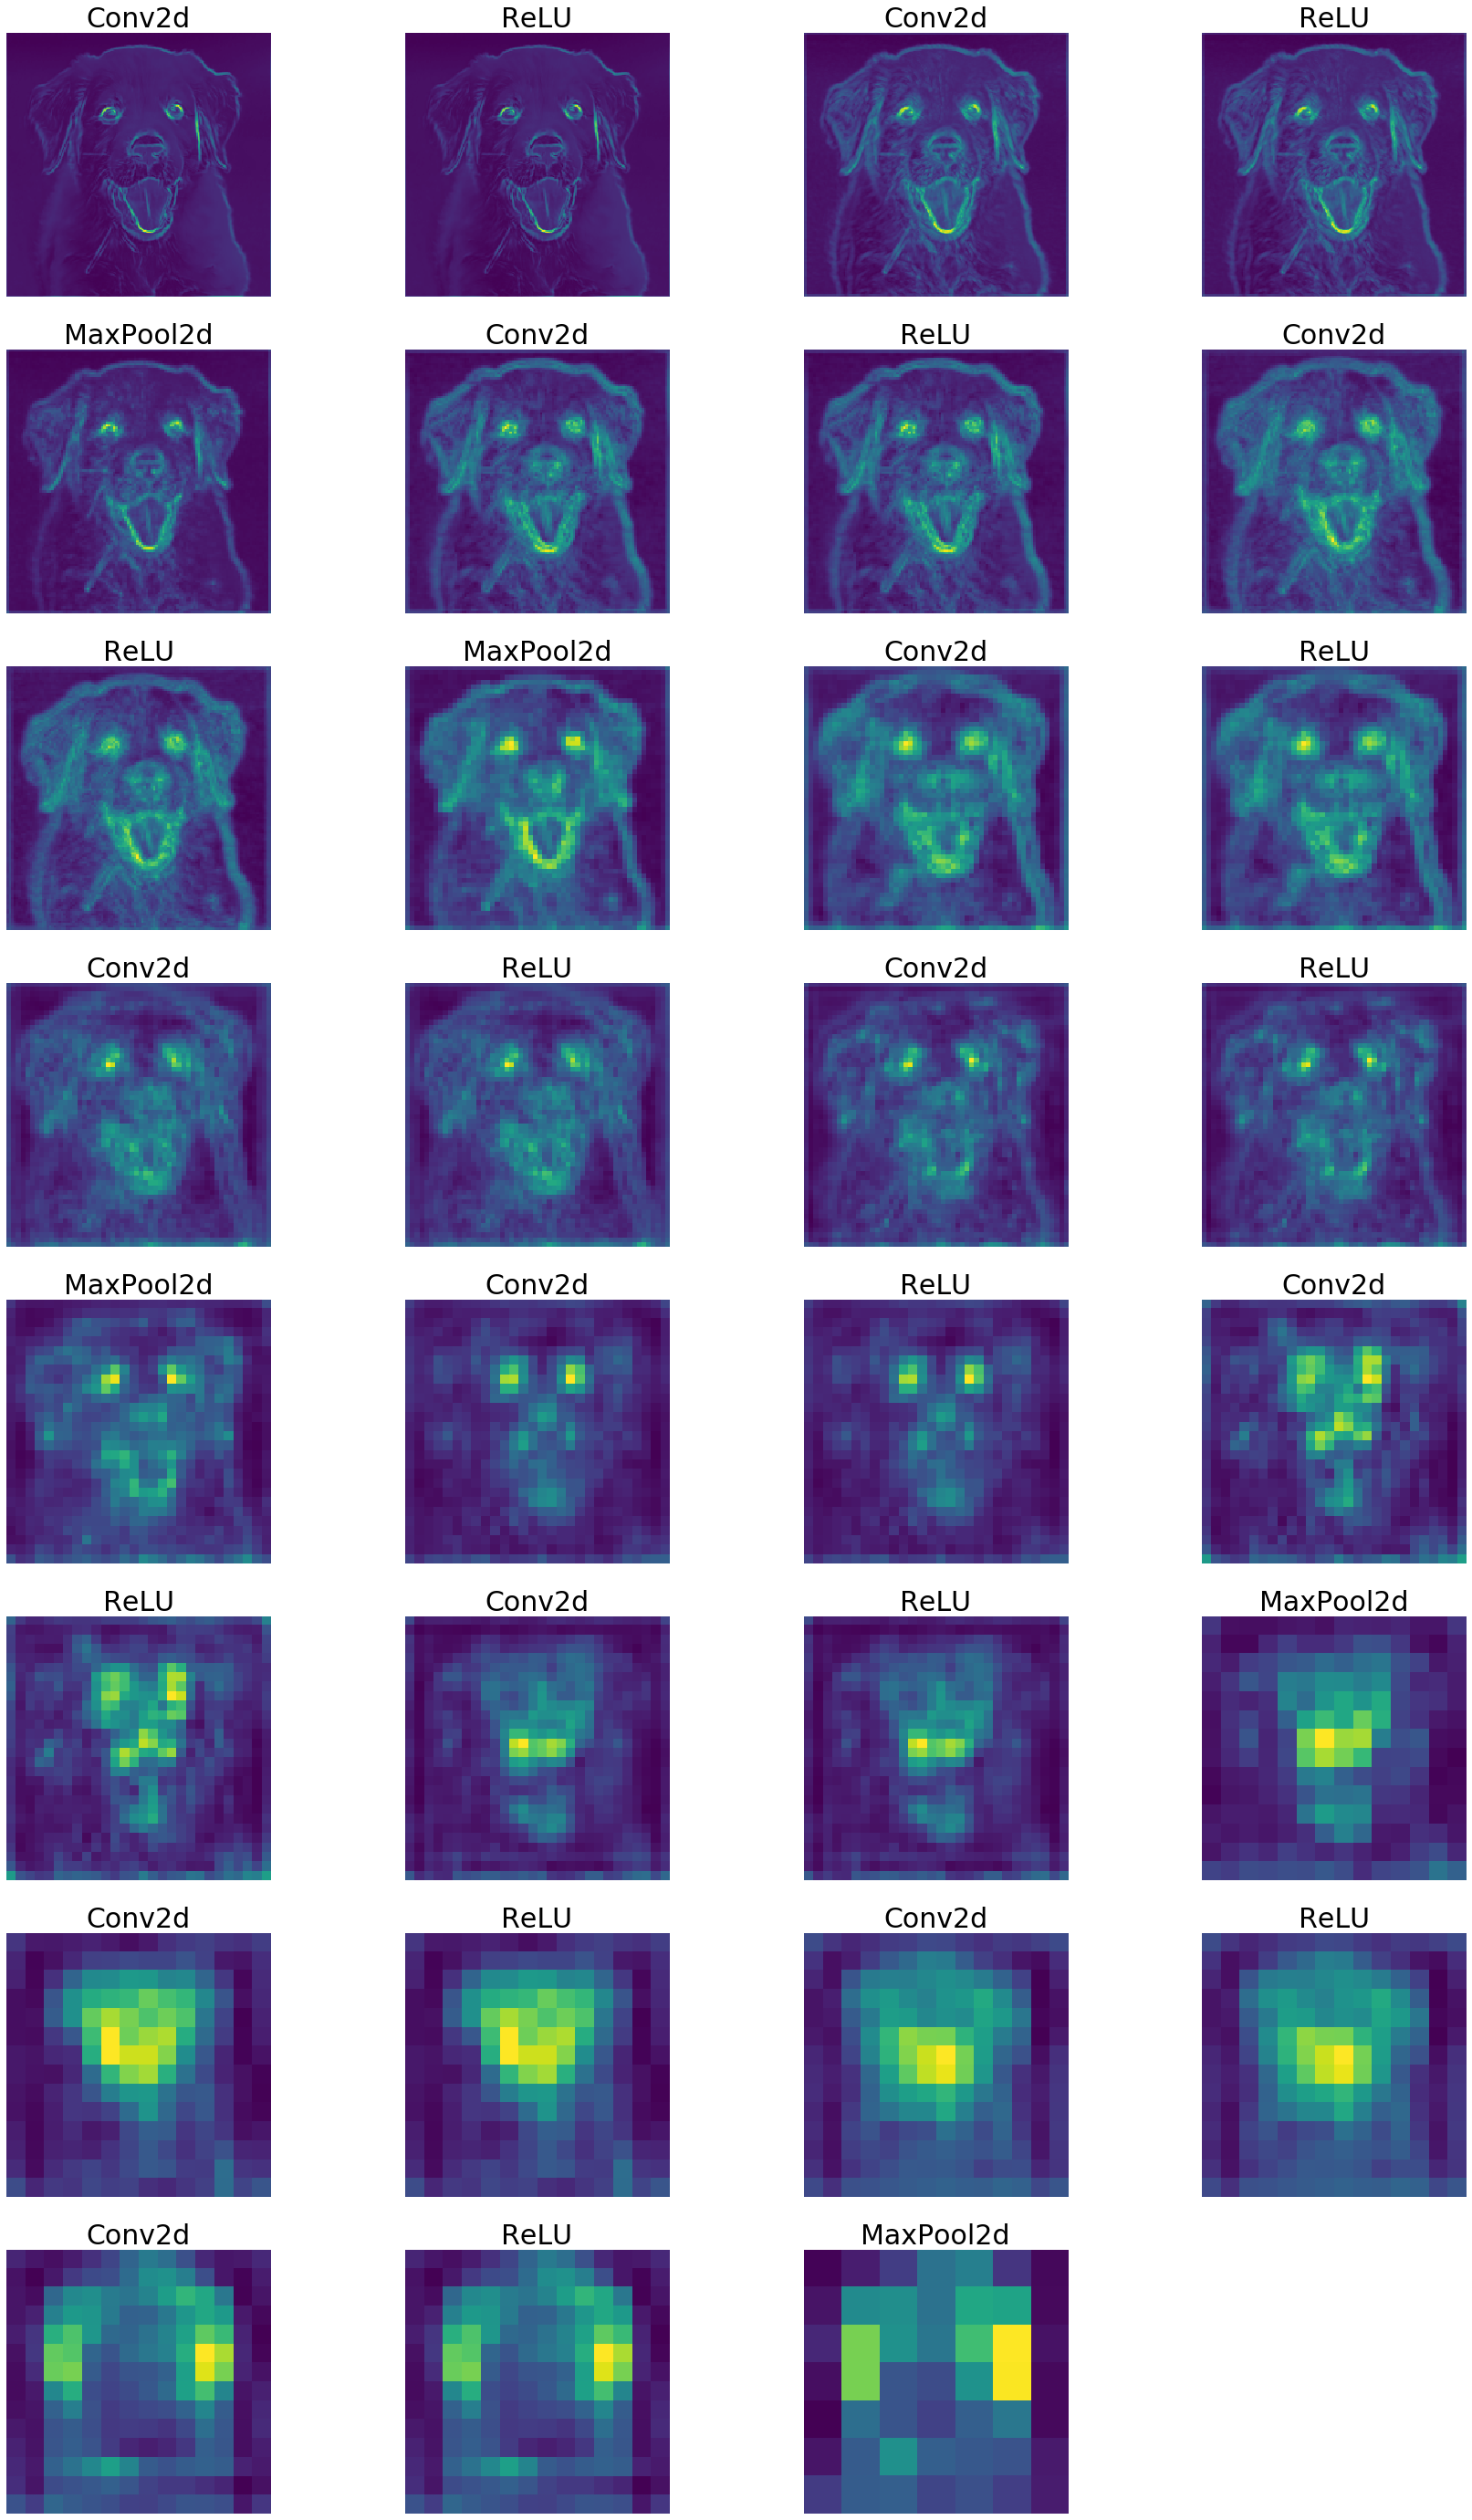

In [44]:
fig = plt.figure(figsize = (30,50))

for i in range(len(processed)):
    a = fig.add_subplot(8,4,i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    a.set_title(names[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.jpg', bbox_inches='tight')